In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/gemmanoguera/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/gemmanoguera/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/gemmanoguera/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/gemmanoguera/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/gemmanoguera/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_

True

# EXERCICI 1
## FREQÜÈNCIA PARAULES
### TEXT: ALICE IN WONDERLAND - DOWN RABBIT HOLE

In [3]:
# import nltk -> processament del llenguatge natural

# importar llibreries -> tractament de dades

import numpy as np
import pandas as pd
import string
import re

# processat i modelat

from nltk.sentiment.vader import SentimentIntensityAnalyzer #anàlisi sentiment
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer


# descarrega text a analitzar

awl = open('alice_in_wonderland.txt', 'r')
rh = awl.read()

print(rh)

Alice was beginning to get very tired of sitting by her
sister on the bank, and of having nothing to do: once or
twice she had peeped into the book her sister was reading,
but it had no pictures or conversations in it, ‘and what is
the use of a book,’ thought Alice ‘without pictures or
conversation?’
So she was considering in her own mind (as well as she
could, for the hot day made her feel very sleepy and
stupid), whether the pleasure of making a daisy-chain
would be worth the trouble of getting up and picking the
daisies, when suddenly a White Rabbit with pink eyes ran
close by her.
There was nothing so very remarkable in that; nor did
Alice think it so very much out of the way to hear the
Rabbit say to itself, ‘Oh dear! Oh dear! I shall be late!’
(when she thought it over afterwards, it occurred to her
that she ought to have wondered at this, but at the time it
all seemed quite natural); but when the Rabbit actually
took a watch out of its waistcoat-pocket, and looked at it, and
the

In [4]:
# neteja text

# text en minúscules
rh_m = rh.lower()


# eliminació números
rh_nn = re.sub("\d+", ' ', rh_m)
 
# eliminació espais multiples en blanc
rh_e = re.sub("\\s+", ' ', rh_nn)


# eliminació signes puntuació
punt = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\´\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
rh_p = re.sub(punt , ' ', rh_e)
print(rh_p)

alice was beginning to get very tired of sitting by her sister on the bank  and of having nothing to do  once or twice she had peeped into the book her sister was reading  but it had no pictures or conversations in it  ‘and what is the use of a book ’ thought alice ‘without pictures or conversation ’ so she was considering in her own mind  as well as she could  for the hot day made her feel very sleepy and stupid   whether the pleasure of making a daisy chain would be worth the trouble of getting up and picking the daisies  when suddenly a white rabbit with pink eyes ran close by her  there was nothing so very remarkable in that  nor did alice think it so very much out of the way to hear the rabbit say to itself  ‘oh dear  oh dear  i shall be late ’  when she thought it over afterwards  it occurred to her that she ought to have wondered at this  but at the time it all seemed quite natural   but when the rabbit actually took a watch out of its waistcoat pocket  and looked at it  and the

In [5]:
# freqüència de paraules

from collections import Counter

paraules = rh_p.split()
frequencia = Counter(paraules)

for paraula, frec in frequencia.items():
    print(paraula, frec)

alice 5
was 6
beginning 1
to 10
get 2
very 4
tired 1
of 8
sitting 1
by 2
her 8
sister 2
on 2
the 14
bank 1
and 7
having 1
nothing 2
do 1
once 2
or 4
twice 1
she 8
had 3
peeped 1
into 1
book 2
reading 1
but 3
it 12
no 1
pictures 2
conversations 1
in 6
‘and 1
what 1
is 1
use 1
a 8
’ 3
thought 2
‘without 1
conversation 1
so 3
considering 2
own 1
mind 2
as 2
well 1
could 1
for 2
hot 1
day 1
made 1
feel 1
sleepy 1
stupid 1
whether 1
pleasure 1
making 1
daisy 1
chain 1
would 1
be 2
worth 1
trouble 1
getting 1
up 1
picking 1
daisies 1
when 3
suddenly 1
white 1
rabbit 5
with 3
pink 1
eyes 1
ran 2
close 1
there 1
remarkable 1
that 3
nor 1
did 1
think 1
much 1
out 4
way 1
hear 1
say 1
itself 1
‘oh 1
dear 2
oh 1
i 1
shall 1
late 1
over 1
afterwards 1
occurred 1
ought 1
have 1
wondered 1
at 3
this 1
time 2
all 1
seemed 1
quite 1
natural 1
actually 1
took 1
watch 2
its 1
waistcoat 2
pocket 2
looked 1
then 1
hurried 1
started 1
feet 1
flashed 1
across 2
never 2
before 1
seen 1
either 1
take 1
burnin

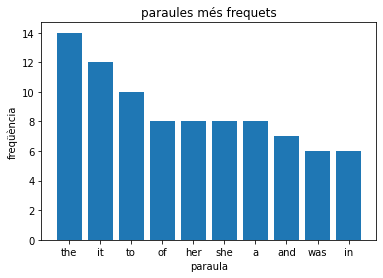

In [6]:
import matplotlib.pyplot as plt

# gràfica 10 paraules més freqüents

paraula_freq = frequencia.most_common(10)

# convertir dos llistes separades per graficar

paraules, frequencies = zip(*paraula_freq)

plt.bar(paraules, frequencies)
plt.title('paraules més frequets')
plt.xlabel('paraula')
plt.ylabel('freqüència')
plt.show()

# EXERCICI 2
### RETIRADA STOPWORDS

In [7]:
# tokenitzar el text 
tokens = word_tokenize(rh_p.lower())


# retirada stopwords (eliminació paraules buides)
filtre_tokens = [token for token in tokens if token not in stopwords.words('english')]

print(filtre_tokens)

['alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', '‘', 'use', 'book', '’', 'thought', 'alice', '‘', 'without', 'pictures', 'conversation', '’', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'daisy', 'chain', 'would', 'worth', 'trouble', 'getting', 'picking', 'daisies', 'suddenly', 'white', 'rabbit', 'pink', 'eyes', 'ran', 'close', 'nothing', 'remarkable', 'alice', 'think', 'much', 'way', 'hear', 'rabbit', 'say', '‘', 'oh', 'dear', 'oh', 'dear', 'shall', 'late', '’', 'thought', 'afterwards', 'occurred', 'ought', 'wondered', 'time', 'seemed', 'quite', 'natural', 'rabbit', 'actually', 'took', 'watch', 'waistcoat', 'pocket', 'looked', 'hurried', 'alice', 'started', 'feet', 'flashed', 'across', 'mind', 'never', 'seen', 'rabbit', 'either', 'waistcoat', 'pocket', 'watch', 'take', 'burning', 'curiosity', 'ran', 'a

In [8]:
# conversió a string

tok = ' '.join(filtre_tokens)
print(tok)

alice beginning get tired sitting sister bank nothing twice peeped book sister reading pictures conversations ‘ use book ’ thought alice ‘ without pictures conversation ’ considering mind well could hot day made feel sleepy stupid whether pleasure making daisy chain would worth trouble getting picking daisies suddenly white rabbit pink eyes ran close nothing remarkable alice think much way hear rabbit say ‘ oh dear oh dear shall late ’ thought afterwards occurred ought wondered time seemed quite natural rabbit actually took watch waistcoat pocket looked hurried alice started feet flashed across mind never seen rabbit either waistcoat pocket watch take burning curiosity ran across field fortunately time see pop large rabbit hole hedge another moment went alice never considering world get


In [9]:
# freqüència de paraules després de tokanitzar

parau = tok.split()
fre = Counter(parau)

for paraula, frec in fre.items():
    print(paraula, frec)

alice 5
beginning 1
get 2
tired 1
sitting 1
sister 2
bank 1
nothing 2
twice 1
peeped 1
book 2
reading 1
pictures 2
conversations 1
‘ 3
use 1
’ 3
thought 2
without 1
conversation 1
considering 2
mind 2
well 1
could 1
hot 1
day 1
made 1
feel 1
sleepy 1
stupid 1
whether 1
pleasure 1
making 1
daisy 1
chain 1
would 1
worth 1
trouble 1
getting 1
picking 1
daisies 1
suddenly 1
white 1
rabbit 5
pink 1
eyes 1
ran 2
close 1
remarkable 1
think 1
much 1
way 1
hear 1
say 1
oh 2
dear 2
shall 1
late 1
afterwards 1
occurred 1
ought 1
wondered 1
time 2
seemed 1
quite 1
natural 1
actually 1
took 1
watch 2
waistcoat 2
pocket 2
looked 1
hurried 1
started 1
feet 1
flashed 1
across 2
never 2
seen 1
either 1
take 1
burning 1
curiosity 1
field 1
fortunately 1
see 1
pop 1
large 1
hole 1
hedge 1
another 1
moment 1
went 1
world 1


### STEMMING

In [10]:
# eliminació paraules repetides

tokk = tok.split(' ')
tok_tok = ' '.join(set(tokk))
print(tok_tok)

large book thought ought alice mind shall without trouble peeped getting remarkable way natural time whether day pocket conversations dear pictures curiosity fortunately made pink pleasure oh get reading hedge picking burning world quite could much stupid well conversation ran daisies pop think moment would suddenly looked feel beginning field never occurred eyes wondered nothing say flashed ’ rabbit see tired seemed use bank another took making ‘ feet seen afterwards hot late white hurried went waistcoat actually watch worth sleepy sitting across considering sister take hear daisy chain close either started hole twice


In [14]:
# Initialize Python porter stemmer
ps = PorterStemmer()

# stemming
print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in word_tok:
    print ("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
large               larg                
book                book                
thought             thought             
ought               ought               
alice               alic                
mind                mind                
shall               shall               
without             without             
trouble             troubl              
peeped              peep                
getting             get                 
remarkable          remark              
way                 way                 
natural             natur               
time                time                
whether             whether             
day                 day                 
pocket              pocket              
conversations       convers             
dear                dear                
pictures            pictur              
curiosity           curios              
fortunately         fortun              
made            

# EXERCICI 3
### ANÀLISI DE SENTIMENT

In [24]:
! pip install -U textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.6 MB/s eta 0:00:0000:0100:01


In [27]:
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/gemmanoguera/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gemmanoguera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gemmanoguera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gemmanoguera/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/gemmanoguera/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/gemmanoguera/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [28]:
from textblob import TextBlob

text = tok_tok

blob = TextBlob(text)

# atribut etiqueta clau-valor
blob.tags

# obtenció llista paraules substantives
blob.noun_phrases   

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)


0.015306122448979585


### puntuació de polaritat és un valor flotant dins el rango [-1.0, 1.0]
### subjectividad valor dins intervalo [0,0, 1,0]
### 0,0 -> molt objectiu
### 1,0 -> molt subjectiu

## text objectiu